In [41]:
import pandas as pd
from SE.snowflake import _get_DF

import seaborn as sns

In [48]:
trans_q = '''
SELECT id
        , addr_state as state
        , addr_city as city
        , addr_zip as zip
        , ML.PROPERTY_MATCHING.clean_unit_string(addr_unit) as secondary
        , addr_street as addr_line
        , closing_date
        , sale_id
    FROM STREETEASY.ANALYTICS.STREETEASY_MYSQL_EXPERTS_TRANSACTIONS
    WHERE status=1
'''

In [49]:
trxn = _get_DF(trans_q)

In [50]:
trxn.groupby(pd.Grouper(key='closing_date', freq='1MS',))['id'].count().sort_index()

closing_date
2019-10-01      1
2019-11-01      0
2019-12-01      1
2020-01-01      1
2020-02-01      4
2020-03-01     15
2020-04-01     11
2020-05-01      9
2020-06-01     10
2020-07-01     11
2020-08-01     23
2020-09-01     29
2020-10-01     32
2020-11-01     42
2020-12-01     60
2021-01-01     55
2021-02-01     84
2021-03-01    113
2021-04-01    100
2021-05-01    126
2021-06-01    149
2021-07-01    174
2021-08-01    164
2021-09-01    155
2021-10-01    160
2021-11-01    137
2021-12-01    134
2022-01-01    167
2022-02-01    157
2022-03-01    161
2022-04-01    175
2022-05-01    205
2022-06-01    237
2022-07-01    186
2022-08-01    221
2022-09-01    174
2022-10-01    172
2022-11-01    138
2022-12-01    159
2023-01-01    136
2023-02-01    113
2023-03-01    172
2023-04-01    168
2023-05-01    210
2023-06-01    264
2023-07-01    210
2023-08-01    212
2023-09-01    170
2023-10-01    183
2023-11-01    153
2023-12-01    153
2024-01-01    145
2024-02-01    150
2024-03-01     96
2024-04-01     

In [4]:
trxn.shape

(6464, 7)

In [5]:
trxn.to_parquet('./data/trxn_2024_03_08.parquet')

## Transaction-Sale Comparison

In [42]:
with open('unmatched.sql', 'r') as f:
    unmatched = f.read()

In [43]:
trxn_sales = _get_DF(unmatched)

In [44]:
trxn_sales['spatial'].quantile(0.95)

14.0

In [40]:
trxn_sales['spatial'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count     3650.000000
mean        19.397808
std        307.002934
min          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%         14.000000
99%        217.100000
max      10514.000000
Name: spatial, dtype: float64

In [37]:
mask = trxn_sales['spatial'].isnull()
mask.sum()

2258

In [39]:
trxn_sales['sale_id'].isnull().sum(), trxn_sales['sale_id'].isnull().mean()

(2258, 0.38219363574813814)

In [28]:
trxn_sales['spatial'].mean()

19.39780821917808

In [26]:
(trxn_sales['spatial'] < 1000).mean()

0.6154366960054164

<AxesSubplot:xlabel='spatial', ylabel='Count'>

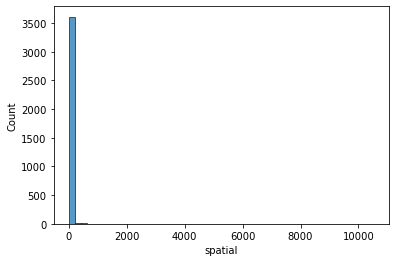

In [14]:
sns.histplot(trxn_sales, x='spatial', bins=50)

<AxesSubplot:xlabel='price_pct_diff', ylabel='Count'>

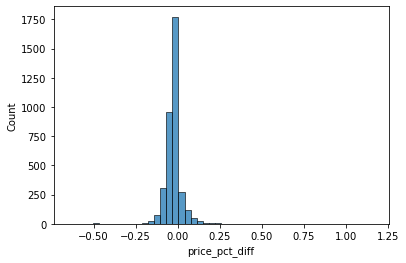

In [20]:
sns.histplot(trxn_sales, x='price_pct_diff', bins=50)

In [24]:
trxn_sales['price_pct_diff'].quantile(0.05), trxn_sales['price_pct_diff'].quantile(0.95)

(-0.09356552138025, 0.047619047619)

0.047619047619

<AxesSubplot:xlabel='days', ylabel='Count'>

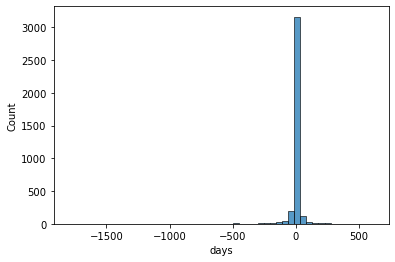

In [23]:
sns.histplot(trxn_sales, x='days', bins=50)

In [25]:
trxn_sales['days'].quantile(0.05), trxn_sales['days'].quantile(0.95)

(-28.0, 33.0)

In [47]:
trxn_sales.shape

(5908, 41)